In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

from statsmodels.formula.api import ols
import scipy

from sklearn.metrics import r2_score
# ln the mean net ticket price
import matplotlib.pyplot as plt
import seaborn as sns

df_sample = pd.read_csv(
  filepath_or_buffer='/Users/saejin123/iCloud Drive (Archive)/Desktop/Data-GP1.csv',
  header='infer', 
  index_col=False,
  parse_dates=['Dept_Date','Purchase_Date'],
  infer_datetime_format=True
)

df_sample['isNormCabin'] = df_sample['isNormCabin'].astype('object')
df_sample['isReturn'] = df_sample['isReturn'].astype('object')
df_sample['isOneway'] = df_sample['isOneway'].astype('object')
df_sample['is_purchase_weekend'] = df_sample['Purchase_Date'].dt.dayofweek.isin([5,6])
df_sample['is_departure_weekend'] = df_sample['Dept_Date'].dt.dayofweek.isin([5,6])
df_sample['days_purchase_before_departure'] = (df_sample['Dept_Date'] - df_sample['Purchase_Date']) / np.timedelta64(1, "D")
df_sample['log10_num_seats_total'] = df_sample['num_seats_total'].apply(np.log10)
df_sample['log10_mean_net_ticket_price'] = df_sample['mean_net_ticket_price'].apply(np.log10)

demand_df = pd.read_csv('/Users/saejin123/iCloud Drive (Archive)/Desktop/Data-GP1.csv')
demand_df.head(10)

,num_seats_total,mean_net_ticket_price,Dept_Date,Purchase_Date,Train_Number_All,Culmulative_sales,isNormCabin,isReturn,isOneway,Customer_Cat
0,1,188.663422,10/9/19,10/10/18,A,1,1,0,0,A
1,1,358.428869,5/27/19,6/6/18,B,1,0,1,0,A
2,1,356.372684,5/31/20,6/17/19,B,1,0,1,0,A
3,1,396.370505,12/10/19,12/27/18,C,1,0,1,0,A
4,1,364.264552,5/31/20,6/19/19,B,2,0,1,0,A
5,1,318.300419,5/23/20,6/20/19,D,1,0,1,0,A
6,2,464.010928,5/23/19,6/20/18,E,2,0,1,0,A
7,1,355.221623,10/18/19,11/15/18,C,1,0,1,0,A
8,1,354.872701,10/14/19,11/15/18,F,1,0,0,0,A
9,3,83.177763,8/12/19,9/13/18,G,47,1,1,0,A


In [2]:
demand_df['D2D'] = df_sample['days_purchase_before_departure']

In [3]:
demand_df['ln_price'] = np.log(demand_df['mean_net_ticket_price'])

In [4]:
df_departure_date_dummy = pd.get_dummies(data= demand_df['Train_Number_All'])

demand_df = pd.concat(objs=[demand_df,df_departure_date_dummy],axis=1)

demand_df.rename(
  columns={
    0: "train_A",
    1: 'train_B',
    2: 'train_C',
    3: 'train_D',
    4: 'train_E',
    5: 'train_F',
    6: 'train_G',
    7: 'train_H',
    8: 'train_I',
    9: 'train_J',
    10: 'train_K',
    11: 'train_L',
    12: 'train_M',
    13: 'train_N',
    14: 'train_O'
  },
  inplace=True
)

In [5]:
demand_df

,num_seats_total,mean_net_ticket_price,Dept_Date,Purchase_Date,Train_Number_All,Culmulative_sales,isNormCabin,isReturn,isOneway,Customer_Cat,...,F,G,H,I,J,K,L,M,N,O
0,1,188.663422,10/9/19,10/10/18,A,1,1,0,0,A,...,0,0,0,0,0,0,0,0,0,0
1,1,358.428869,5/27/19,6/6/18,B,1,0,1,0,A,...,0,0,0,0,0,0,0,0,0,0
2,1,356.372684,5/31/20,6/17/19,B,1,0,1,0,A,...,0,0,0,0,0,0,0,0,0,0
3,1,396.370505,12/10/19,12/27/18,C,1,0,1,0,A,...,0,0,0,0,0,0,0,0,0,0
4,1,364.264552,5/31/20,6/19/19,B,2,0,1,0,A,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209692,4,468.650070,3/26/19,3/26/19,L,4,0,0,0,B,...,0,0,0,0,0,0,1,0,0,0
209693,1,468.659177,12/21/18,12/21/18,J,1,0,0,1,B,...,0,0,0,0,1,0,0,0,0,0
209694,1,668.061946,6/9/19,6/9/19,J,10,0,0,0,B,...,0,0,0,0,1,0,0,0,0,0
209695,2,381.438513,1/17/19,1/17/19,L,17,0,0,0,B,...,0,0,0,0,0,0,1,0,0,0


In [6]:
demand_df['Customer_Cat'].iloc[demand_df['Customer_Cat'] == 'A'] = 0
demand_df['Customer_Cat'].iloc[demand_df['Customer_Cat'] == 'B'] = 1

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [7]:
reduced_price = ols('ln_price ~ A + B + C + D + E + F + G + H + I + J + K + L + M + O + isNormCabin + isOneway + Customer_Cat', data = demand_df).fit()
reduced_seats = ols('num_seats_total ~ A + B + C + D + E + F + G + H + I + J + K + L + M + O + isNormCabin + isOneway + Customer_Cat', data = demand_df).fit()
print(reduced_price.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.574      
Dependent Variable: ln_price         AIC:                208204.3775
Date:               2021-09-21 18:26 BIC:                208388.9390
No. Observations:   209697           Log-Likelihood:     -1.0408e+05
Df Model:           17               F-statistic:        1.662e+04  
Df Residuals:       209679           Prob (F-statistic): 0.00       
R-squared:          0.574            Scale:              0.15801    
--------------------------------------------------------------------
                    Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
Intercept           6.0657   0.0081  745.9994 0.0000  6.0498  6.0817
Customer_Cat[T.1]  -0.2906   0.0023 -123.7146 0.0000 -0.2952 -0.2860
A                  -0.1583   0.0089  -17.8626 0.0000 -0.1756 -0.1409
B                  -0.2121   0.0085  -25.0599 0.0000 

In [8]:
structural_form = ols('num_seats_total ~ ln_price', demand_df).fit() # no endo problem -  biased but smaller standard error
structural_form.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.052      
Dependent Variable: num_seats_total  AIC:                891771.4321
Date:               2021-09-21 18:26 BIC:                891791.9389
No. Observations:   209697           Log-Likelihood:     -4.4588e+05
Df Model:           1                F-statistic:        1.145e+04  
Df Residuals:       209695           Prob (F-statistic): 0.00       
R-squared:          0.052            Scale:              4.1156     
---------------------------------------------------------------------
                Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept       6.4695    0.0384   168.2589  0.0000   6.3941   6.5449
ln_price       -0.7784    0.0073  -106.9939  0.0000  -0.7926  -0.7641
--------------------------------------------------------------------
Omnibus:            167118.064     Durbin-Watson:        1.749      
Prob(Omnibus):      0.000          Jarque-Bera (JB):     8347069.210
Skew:               3.460          Prob(JB):             0.000      
Kurtosis:           33.124         Condition No.:        47         
====================================================================

"""

In [9]:
predicted_price = reduced_price.predict(demand_df[['A' , 'B', 'C', 'D' ,'E', 'F', 'G', 'H' , 'I' , 'J', 'K', 'L' , 'M' ,'O','isNormCabin', 'isOneway', 'Customer_Cat']])

In [10]:
#reduced_seats.summary2()

In [11]:
demand_df['predPrice'] = predicted_price

In [12]:
struc_2sls_form = ols('num_seats_total ~ predPrice', demand_df).fit() 
struc_2sls_form.summary2()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.047      
Dependent Variable: num_seats_total  AIC:                892764.0439
Date:               2021-09-21 18:26 BIC:                892784.5507
No. Observations:   209697           Log-Likelihood:     -4.4638e+05
Df Model:           1                F-statistic:        1.040e+04  
Df Residuals:       209695           Prob (F-statistic): 0.00       
R-squared:          0.047            Scale:              4.1351     
---------------------------------------------------------------------
                Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept       7.5373    0.0507   148.5813  0.0000   7.4379   7.6367
predPrice      -0.9818    0.0096  -101.9969  0.0000  -1.0006  -0.9629
--------------------------------------------------------------------
Omnibus:            166715.615     Durbin-Watson:        1.770      
Prob(Omnibus):      0.000          Jarque-Bera (JB):     8274629.665
Skew:               3.449          Prob(JB):             0.000      
Kurtosis:           32.991         Condition No.:        62         
====================================================================

"""

In [13]:
demand_df['res1stage'] = reduced_price.resid

In [14]:
hausman_model = ols('num_seats_total ~ ln_price + res1stage', data = demand_df).fit()

In [15]:
hausman_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
====================================================================
Model:              OLS              Adj. R-squared:     0.057      
Dependent Variable: num_seats_total  AIC:                890717.7879
Date:               2021-09-21 18:26 BIC:                890748.5481
No. Observations:   209697           Log-Likelihood:     -4.4536e+05
Df Model:           2                F-statistic:        6282.      
Df Residuals:       209694           Prob (F-statistic): 0.00       
R-squared:          0.057            Scale:              4.0949     
---------------------------------------------------------------------
                Coef.   Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
Intercept       7.5373    0.0505   149.3083  0.0000   7.4384   7.6363
ln_price       -0.9818    0.0096  -102.4960  0.0000  -1.0005  -0.9630
res1stage       0.4774    0.0147    32.5314  0.0000   0.4486   0.5061
--------------------------------------------------------------------
Omnibus:            167238.072     Durbin-Watson:        1.763      
Prob(Omnibus):      0.000          Jarque-Bera (JB):     8445097.716
Skew:               3.460          Prob(JB):             0.000      
Kurtosis:           33.310         Condition No.:        64         
====================================================================

"""

<AxesSubplot:xlabel='predPrice', ylabel='num_seats_total'>

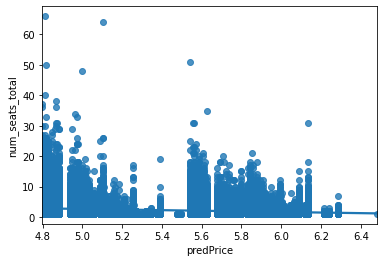

In [16]:
sns.regplot(x='predPrice', y='num_seats_total', data=demand_df)

<AxesSubplot:xlabel='ln_price', ylabel='num_seats_total'>

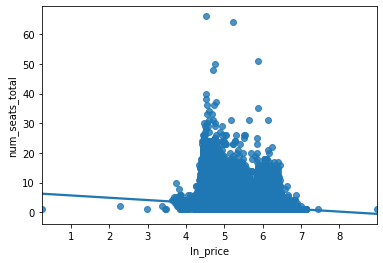

In [17]:
sns.regplot(x='ln_price', y='num_seats_total', data=demand_df)